[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1QPsU3xbgoY25jiMgoWamYhxKLT_iMHYA#scrollTo=XDspGgUS55Xo)

# Installazione delle librerie necessarie per l'analisi dei dati

In [ ]:
!pip install scikit-learn==0.24.2 cluster-over-sampling

     |████████████████████████████████| 22.3 MB 1.4 MB/s 
     |████████████████████████████████| 206 kB 60.1 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


# Import delle librerire fondamentali per l'analisi dei dati

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import re
from sklearn.model_selection import train_test_split

# Ottenimento dataset
La variabile `DATASET_PATH` sarà settata con il valore corretto.

**Settare a** `True` **la variabile** `from_gdrive` **per accedere al dataset tramite Google Drive. Settarla a** `False`
**per accedere al dataset in locale.**

In [ ]:
from_gdrive = True
if from_gdrive:
    from google.colab import drive
    drive.mount("/content/gdrive")
    %cd gdrive/MyDrive/ProjectAI/
    DATASET_PATH = "Data/invalsi_mat_2014.csv"
else:
    DATASET_PATH = "../invalsi_mat_2014.csv"

Mounted at /content/gdrive
/content/gdrive/.shortcut-targets-by-id/1A0bC_-pQ-oWUI2c5-EqQVAZ6051G0tKg/ProjectAI


In [ ]:
in_jupyter_notebook = False
if in_jupyter_notebook:
    from IPython.core.display import display, HTML
    display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
from_azure = False
if from_azure:
    from azureml.core import Workspace
    from os import environ
    #%load_ext dotenv
    #%dotenv
    # Eseguire export $(cat .env | xargs)
    subscription_id = environ.get('subscription_id')
    resource_group = environ.get('resource_group')
    workspace_name = environ.get('workspace_name')
    workspace = Workspace(subscription_id, resource_group, workspace_name)

## Utility per tipi e conversioni

In [ ]:
from typing import List, Dict, Tuple
string_list = List[str]
one_hot_list = Tuple[int]
one_hot_encoding_list = Dict[str, one_hot_list]
one_hot_encoding_int = Dict[str, int]

## Mappe e funzioni per conversioni valori del dataset in valori numerici o booleani

In [ ]:
def from_categorical_to_one_hot_int(categorical_data: string_list) -> one_hot_encoding_int:
    dictionary_to_return = {}
    for index, key in enumerate(categorical_data):
        dictionary_to_return[key] = index
    
    return dictionary_to_return

def from_categorical_to_one_hot_list(categorical_data: string_list) -> one_hot_encoding_list:
    dictionary_to_return = {}
    indexes = range(len(categorical_data))
    for index, key in enumerate(categorical_data):
        dictionary_to_return[key] = [1 if index == i else 0 for i in indexes]
    
    return dictionary_to_return

#Features categorica -> One Hot Encoding
list_MESI = ["Gennaio", "Febbraio", "Marzo", "Aprile", "Maggio", "Giugno", "Luglio", "Agosto", "Settembre", "Ottobre", "Novembre", "Dicembre", "Non disponibile"]
MESI = from_categorical_to_one_hot_int(list_MESI)

#Features categorica -> One Hot Encoding
list_ANNI = ["2000", "2001", "1999", "1998", "<=1997", ">=2002", "Non disponibile"]
ANNI = from_categorical_to_one_hot_int(list_ANNI)

#Features categorica -> One Hot Encoding
list_ETA = ['Mancante di sistema', 'Non disponibile', '6 anni', '5 anni', '10 anni o più', '2 anni', '1 anno o prima', '9 anni', '8 anni', '4 anni', '7 anni', '3 anni']
ETA = from_categorical_to_one_hot_int(list_ETA)

def convert_question_result(result: str) -> bool:
    return result == "Corretta" # alternativamente result == "Errata"

#Features categorica -> One Hot Encoding
list_REGOLARITA = ['Regolare', 'Posticipatario', 'Anticipatario', 'Dato mancante']
REGOLARITA = from_categorical_to_one_hot_int(list_REGOLARITA)

#Features categorica -> One Hot Encoding
list_AREA_GEOGRAFICA_5_ISTAT = ['Sud', 'Nord est', 'Centro', 'Nord ovest', 'Isole']
AREA_GEOGRAFICA_5_ISTAT = from_categorical_to_one_hot_int(list_AREA_GEOGRAFICA_5_ISTAT)

#Features categorica -> One Hot Encoding
list_AREA_GEOGRAFICA_5 = ['Sud', 'Nord est', 'Centro', 'Nord ovest', 'Sud e isole']
AREA_GEOGRAFICA_5 = from_categorical_to_one_hot_int(list_AREA_GEOGRAFICA_5)

#Features categorica -> One Hot Encoding
list_AREA_GEOGRAFICA_4 = ['Mezzogiorno', 'Nord est', 'Centro', 'Nord ovest']
AREA_GEOGRAFICA_4 = from_categorical_to_one_hot_int(list_AREA_GEOGRAFICA_4)

#Features categorica -> One Hot Encoding
list_AREA_GEOGRAFICA_3 = ['Mezzogiorno', 'Nord', 'Centro']
AREA_GEOGRAFICA_3 = from_categorical_to_one_hot_int(list_AREA_GEOGRAFICA_3)

#Features categorica -> One Hot Encoding
list_REGIONI = ['Campania', 'Emilia-Romagna', 'Lazio', 'Piemonte', 'Puglia', 'Lombardia', 'Veneto', 'Sicilia', 'Prov. Aut. Trento', 'Friuli-Venezia Giulia', 'Abruzzo', 'Liguria', 'Toscana', 'Sardegna', 'Calabria', 'Molise', 'Marche', 'Umbria', 'Basilicata', 'Prov. Aut. Bolzano (l. it.)']
REGIONI = from_categorical_to_one_hot_int(list_REGIONI)

#Features categorica -> One Hot Encoding
list_PROVINCE = ['', 'RE', 'FR', 'TO', 'BA', 'CO', 'LE', 'RO', 'CT', 'RM', 'TA', 'BS', 'SA', 'TN', 'UD', 'FG', 'LT', 'AG', 'CH', 'PC', 'TS', 'SR', 'SP', 'PD', 'SI', 'PA', 'TP', 'BO', 'CA', 'CN', 'RC', 'TE', 'MI', 'LC', 'LU', 'FI', 'AQ', 'TV', 'RG', 'VA', 'GO', 'MO', 'GE', 'AL', 'CB', 'PR', 'OR', 'VE', 'MC', 'NO', 'PT', 'MN', 'VR', 'PI', 'AP', 'LO', 'VI', 'SV', 'PU', 'BG', 'AR', 'VT', 'LI', 'SS', 'BR', 'RA', 'TR', 'SO', 'IM', 'PZ', 'GR', 'AN', 'PN', 'ME', 'CR', 'FE', 'BI', 'PV', 'PG', 'VB', 'BL', 'PE', 'CS', 'CZ', 'AV', 'RN', 'CL', 'AT', 'MS', 'KR', 'RI', 'EN', 'CE', 'MT', 'VV', 'VC', 'NU', 'FC', 'PO', 'BZ', 'BN', 'IS', 
            'NA', # presente in cod_provincia_ISTAT ma non in sigla_provincia_istat
            'PS', # presente in cod_provincia_ISTAT ma non in sigla_provincia_istat
            'FO', # presente in cod_provincia_ISTAT ma non in sigla_provincia_istat
            'LB', # presente in cod_provincia_ISTAT ma non in sigla_provincia_istat
]
PROVINCE = from_categorical_to_one_hot_int(list_PROVINCE)

#Features categorica -> One Hot Encoding
list_CITTADINANZA = ['Italiano', 'Straniero II generazione', 'Straniero I generazione', 'Dato mancante']
CITTADINANZA = from_categorical_to_one_hot_int(list_CITTADINANZA)

list_VOTI_NUMERICI = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
def voto_orale_decode(voto_orale: str) -> float:
    if voto_orale in list_VOTI_NUMERICI:
        return float(voto_orale)
    elif voto_orale == 'Non disponibile':
        return np.nan
    elif voto_orale == 'Non classificato': 
        return 0.0

list_VOTI_NAN = ['Non disponibile', 'Senza voto scritto']
def voto_scritto_decode(voto_scritto: str) -> float:
    if voto_scritto in list_VOTI_NUMERICI:
        return float(voto_scritto)
    elif voto_scritto in list_VOTI_NAN:
        return np.nan
    elif voto_scritto == 'Non classificato': 
        return 0.0

def sesso_to_num(sesso: str) -> int:
    return 0 if sesso == "Maschio" else 1

#Features categorica -> One Hot Encoding
list_PROFESSIONI = ['1. Disoccupato/a', '2. Casalingo/a', '3. Dirigente, docente universitario, funzionario o ufficiale militare', '4. Imprenditore/proprietario agricolo', '5. Professionista dipendente, sottuff. militare o libero profession. (medico, av', '6. Lavoratore in proprio (commerciante, coltivatore diretto, artigiano, meccanic', '7. Insegnante, impiegato, militare graduato', '8. Operaio, addetto ai servizi/socio di cooperativa', '9. Pensionato/a', '10. Non disponibile']
PROFESSIONI = from_categorical_to_one_hot_int(list_PROFESSIONI)

#Features categorica -> One Hot Encoding
list_TITOLI = ['1. Licenza elementare', '2. Licenza media', '3. Qualifica professionale triennale', '4. Diploma di maturità', '5. Altro titolo di studio superiore al diploma (I.S.E.F., Accademia di Belle Art', '6. Laurea o titolo superiore (ad esempio Dottorato di Ricerca)', '7. Non disponibile']
TITOLI = from_categorical_to_one_hot_int(list_TITOLI)

#Features categorica -> One Hot Encoding
list_LUOGHI_GENITORI = ['Italia (o Repubblica di San Marino)', 'Unione Europea', 'Paese europeo Non UE', 'Altro', 'Non disponibile']
LUOGHI_GENITORI = from_categorical_to_one_hot_int(list_LUOGHI_GENITORI)

#Features categorica -> One Hot Encoding
list_FREQUENZA_SCUOLA = ['No', 'Sì', 'Non disponibile']
FREQUENZA_SCUOLA = from_categorical_to_one_hot_int(list_FREQUENZA_SCUOLA)

#Features categorica -> One Hot Encoding
list_LUOGO_DI_NASCITA = ['Italia (o Repubblica di San Marino)', 'Unione Europea', 'Paese europeo Non UE', 'Altro', 'Non disponibile']
LUOGO_DI_NASCITA = from_categorical_to_one_hot_int(list_LUOGO_DI_NASCITA)

Definiamo le conversioni che si dovranno eseguire al momento dell'import.

In [ ]:
columns_converters = {
    "CODICE_SCUOLA": str, #identificativo della scuola (non considerato)
    "CODICE_PLESSO": str, #identificativo del plesso (non considerato)
    "CODICE_CLASSE": str, #identificato della classe (non considerato)
    "macrotipologia": str, #categoria di scuola (non considerato)
    "campione": int, #campione di riferimento (non considerato)
    "livello": int, # (non considerato)
    "prog": int,
    "CODICE_STUDENTE": str, #codice dello studente (non considerato)
    "sesso": sesso_to_num, #sesso dello studente
    "mese": lambda month: MESI[month], #mese di nascita
    "anno": lambda year: ANNI[year], #anno di nascita
    "luogo": lambda luogo: LUOGO_DI_NASCITA[luogo],
    "eta": lambda eta: ETA[eta], # cosa vuol dire eta?
    "codice_orario": lambda _: np.nan, # unico dato: Mancante di sistema
    "freq_asilo_nido": lambda frequenza: FREQUENZA_SCUOLA[frequenza],
    "freq_scuola_materna": lambda frequenza: FREQUENZA_SCUOLA[frequenza],
    "luogo_padre": lambda luogo: LUOGHI_GENITORI[luogo],
    "titolo_padre": lambda titolo: TITOLI[titolo],
    "prof_padre": lambda professione: PROFESSIONI[professione],
    "luogo_madre": lambda luogo: LUOGHI_GENITORI[luogo],
    "titolo_madre": lambda titolo: TITOLI[titolo],
    "prof_madre": lambda professione: PROFESSIONI[professione],
    "voto_scritto_ita": lambda voto: voto_scritto_decode(voto),
    "voto_orale_ita": lambda voto: voto_orale_decode(voto),
    "voto_scritto_mat": lambda voto: voto_scritto_decode(voto),
    "voto_orale_mat": lambda voto: voto_orale_decode(voto),
    "D1": lambda result: convert_question_result(result),
    "D2": lambda result: convert_question_result(result),
    "D3_a": lambda result: convert_question_result(result),
    "D3_b": lambda result: convert_question_result(result),
    "D4_a": lambda result: convert_question_result(result),
    "D4_b": lambda result: convert_question_result(result),
    "D4_c": lambda result: convert_question_result(result),
    "D4_d": lambda result: convert_question_result(result),
    "D5_a": lambda result: convert_question_result(result),
    "D5_b": lambda result: convert_question_result(result),
    "D6": lambda result: convert_question_result(result),
    "D7_a": lambda result: convert_question_result(result),
    "D7_b": lambda result: convert_question_result(result),
    "D8": lambda result: convert_question_result(result),
    "D9": lambda result: convert_question_result(result),
    "D10_a": lambda result: convert_question_result(result),
    "D10_b1": lambda result: convert_question_result(result),
    "D10_b2": lambda result: convert_question_result(result),
    "D10_b3": lambda result: convert_question_result(result),
    "D11_a": lambda result: convert_question_result(result),
    "D11_b": lambda result: convert_question_result(result),
    "D12_a": lambda result: convert_question_result(result),
    "D12_b": lambda result: convert_question_result(result),
    "D13_a": lambda result: convert_question_result(result),
    "D13_b": lambda result: convert_question_result(result),
    "D13_c": lambda result: convert_question_result(result),
    "D14": lambda result: convert_question_result(result),
    "D15": lambda result: convert_question_result(result),
    "D16_a": lambda result: convert_question_result(result),
    "D16_b": lambda result: convert_question_result(result),
    "D16_c": lambda result: convert_question_result(result),
    "D16_d": lambda result: convert_question_result(result),
    "D17_a": lambda result: convert_question_result(result),
    "D17_b": lambda result: convert_question_result(result),
    "D18": lambda result: convert_question_result(result),
    "D19_a": lambda result: convert_question_result(result),
    "D19_b": lambda result: convert_question_result(result),
    "D20": lambda result: convert_question_result(result),
    "D21": lambda result: convert_question_result(result),
    "D22": lambda result: convert_question_result(result),
    "D23_a": lambda result: convert_question_result(result),
    "D23_b": lambda result: convert_question_result(result),
    "D23_c": lambda result: convert_question_result(result),
    "D23_d": lambda result: convert_question_result(result),
    "D24_a": lambda result: convert_question_result(result),
    "D24_b": lambda result: convert_question_result(result),
    "D25": lambda result: convert_question_result(result),
    "D26_a": lambda result: convert_question_result(result),
    "D26_b": lambda result: convert_question_result(result),
    "D26_c": lambda result: convert_question_result(result),
    "D26_d": lambda result: convert_question_result(result),
    "regolarità": lambda regular: REGOLARITA[regular],
    "cittadinanza": lambda cittadinanza: CITTADINANZA[cittadinanza],
    "cod_provincia_ISTAT": lambda province_istat: PROVINCE[province_istat.upper()],
    "sigla_provincia_istat": lambda province: PROVINCE[province],
    "Nome_reg": lambda regione: REGIONI[" ".join(regione.split())],
    "Cod_reg": lambda codice: REGIONI[codice],
    "Areageo_3": lambda area: AREA_GEOGRAFICA_3[area],
    "Areageo_4": lambda area: AREA_GEOGRAFICA_4[area],
    "Areageo_5": lambda area: AREA_GEOGRAFICA_5[area],
    "Areageo_5_Istat": lambda area: AREA_GEOGRAFICA_5_ISTAT[area],
    "Pon": lambda pon: True if pon == "Area_Pon" else False, # lo studente appartiene all'aera Pon oppure no
    "pu_ma_gr": int,
    "pu_ma_no": float,
    "Fattore_correzione_new": float,
    "Cheating": float,
    "PesoClasse": lambda val: float(val) if val != "" else np.nan, # (non considerato)
    "PesoScuola": lambda val: float(val) if val != "" else np.nan, # (non considerato)
    "PesoTotale_Matematica": lambda val: float(val) if val != "" else np.nan, # (non considerato)
    "WLE_MAT": float,
    "WLE_MAT_200": float,
    "WLE_MAT_200_CORR": float,
    "pu_ma_no_corr": float,
    "n_stud_prev": lambda val: int(float(val)),
    "n_classi_prev": lambda val: int(float(val)),
    "LIVELLI": int,
    "DROPOUT": eval
}

## Lettura del dataset

In [ ]:
if not from_azure:
    dataset = pd.read_csv(DATASET_PATH, sep=';', converters=columns_converters)
else:
    from azureml.core import Workspace, Dataset
    dataset = Dataset.get_by_name(workspace, name='invalsi_mat_2014')
    dataset = dataset.to_pandas_dataframe()

## Verifica per la presenza di variabili categoriche
Oltre alle variabili categoriche fin qui trovate si vuole verificare quali discriminano in maniera non significativa le osservazioni.

In [ ]:
# codice che restituisce le colonne che hanno un nr di valori distinti < 4
[cname for cname in dataset.columns if dataset[cname].nunique() < 4 and dataset[cname].dtype != "bool"]

['macrotipologia',
 'campione',
 'livello',
 'sesso',
 'codice_orario',
 'freq_asilo_nido',
 'freq_scuola_materna',
 'Areageo_3']

In [ ]:
# codice per ottenere le variabili qualitative/categoriche
s = (dataset.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['CODICE_SCUOLA', 'CODICE_PLESSO', 'CODICE_CLASSE', 'macrotipologia', 'CODICE_STUDENTE']


## Eliminazione colonne superflue
Vengono rimosse dal dataset originale tutte quegli attributi che si suppone non abbiano alcuna rilevanza nell'esito della cella DROPOUT.
Inoltre, per la compuntazione del clustering ai fini dell'oversampling è necessario rimuovere degli ulteriori attributi poiché ricchi di valori nulli e quindi problematici.


In [ ]:
columns_to_drop = ["Unnamed: 0", # Indice record
                   "CODICE_SCUOLA",
                   "CODICE_PLESSO",
                   "CODICE_CLASSE",
                   "macrotipologia",
                   "campione",
                   "livello",
                   "CODICE_STUDENTE",
                   "codice_orario",
                   "PesoClasse", # potrebbe essere utile?
                   "PesoScuola", # potrebbe essere utile?
                   "PesoTotale_Matematica", # potrebbe essere utile?
                   ]
columns_maybe_to_drop = ["voto_scritto_ita", #Ricco di NaN
                         "voto_scritto_mat",#Ricco di NaN
                         "voto_orale_ita", # Pochi NaN ma va tolto per cluster-based oversampling
                         "voto_orale_mat" # Pochi NaN ma va tolto per cluster-based oversampling
                        ]
for col in columns_maybe_to_drop:
   print("Percentage of NaN in column: ", col, end=" ")
   print(round(dataset[col].isnull().mean() * 100, 2), "%")
   
dataset = dataset.drop(columns_to_drop + columns_maybe_to_drop, axis=1)

Percentage of NaN in column:  voto_scritto_ita 68.33 %
Percentage of NaN in column:  voto_scritto_mat 68.27 %
Percentage of NaN in column:  voto_orale_ita 11.3 %
Percentage of NaN in column:  voto_orale_mat 11.42 %


# Matrici correlazione tra domande
Con le seguenti matrici di correlazione si cerca di vedere se sono presenti domande fortemente correlate in modo da poterne rimuovere e semplificare una riduzione di dimensionalità.

In [ ]:
questions_columns = [col for col in columns_converters.keys() if re.search("^D\d", col)]
questions_dataset = dataset[questions_columns]

## Standard correlation coefficient (pearson method)

In [ ]:
questions_correlate_matrix_pearson = questions_dataset.corr(method='pearson').round(2)
questions_correlate_matrix_pearson.style.background_gradient(cmap='YlOrRd')

## Kendall Tau correlation coefficient

In [ ]:
questions_correlate_matrix_kendall = questions_dataset.corr(method='kendall').round(2)
questions_correlate_matrix_kendall.style.background_gradient(cmap='YlOrRd')

## Spearman rank correlation

In [ ]:
questions_correlate_matrix_spearman = questions_dataset.corr(method='spearman').round(2)
questions_correlate_matrix_spearman.style.background_gradient(cmap='YlOrRd')

## Nota sulle matrici di correlazione ottenute
Le **matrici di correlazione sulle domande** non evidenziano significative dipendenze lineari tra di esse: i valori più elevati appaiono in corrispondenza di domande consecutive, il più delle volte parti della stessa domanda (e.g. D7, D3 e D4).  
Conseguentemente, **non è possibile realizzare alcuna riduzione di dimensionalità**.

# Rappresentazione delle domande per generalizzazione con coorti diverse
Addestrando la rete con le domande non si ottiene nulla di replicabili in coorti successive.
E' possibile però trasformare le domande e i risultati dati dagli studenti in altre feature. Ogni domanda dispone infatti di un ambito, uno scopo e un processo.  
Per questo motivo le domande vengono trasformate in due modalità:

- da domanda a coppia ambito - processo;
- da domanda a vettore di termini chiave  estratti tramite Natural Language Processing dallo scopo.

## Generalizzazione Domanda => (Ambito, Processo)

In [ ]:
# mapping domanda - ambito, processo
questions_ambiti_processi = {
    'D1' : ('Numeri', 'Conoscere e utilizzare algoritmi e procedure'),
    'D2' : ('Dati e previsioni', 'Conoscere e padroneggiare i contenuti specifici della matematica'),
    'D3_a' : ('Dati e previsioni', 'Utilizzare strumenti, modelli e rappresentazioni nel trattamento quantitativo dell\'informazione in ambito scientifico, tecnologico, economico e sociale'),
    'D3_b': ('Numeri', 'Conoscere e utilizzare algoritmi e procedure'),
    'D4_a' : ('Spazio figure', 'Riconoscere le forme nello spazio e utilizzarle per la risoluzione di problemi geometrici o di modellizzazione'),
    'D4_b' : ('Spazio figure', 'Riconoscere le forme nello spazio e utilizzarle per la risoluzione di problemi geometrici o di modellizzazione'),
    'D4_c' : ('Spazio figure', 'Riconoscere le forme nello spazio e utilizzarle per la risoluzione di problemi geometrici o di modellizzazione'),
    'D4_d' : ('Spazio figure', 'Riconoscere le forme nello spazio e utilizzarle per la risoluzione di problemi geometrici o di modellizzazione'),
    'D5_a' : ('Relazioni e funzioni', 'Conoscere e utilizzare algoritmi e procedure'),
    'D5_b' : ('Relazioni e funzioni', 'Utilizzare strumenti, modelli e rappresentazioni nel trattamento quantitativo dell\'informazione in ambito scientifico, tecnologico, economico e sociale'),
    'D6' : ('Numeri', 'Acquisire progressivamente forme tipiche del pensiero matematico'),
    'D7_a' : ('Numeri', 'Conoscere e padroneggiare i contenuti specifici della matematica'),
    'D7_b' : ('Numeri', 'Conoscere e padroneggiare i contenuti specifici della matematica'),
    'D8' : ('Spazio figure', 'Riconoscere le forme nello spazio e utilizzarle per la risoluzione di problemi geometrici o di modellizzazione'),
    'D9' : ('Relazioni e funzioni', 'Utilizzare strumenti, modelli e rappresentazioni nel trattamento quantitativo dell\'informazione in ambito scientifico, tecnologico, economico e sociale'),
    'D10_a'  : ('Relazioni e funzioni', 'Rappresentare relazioni e dati e, in situazioni significative, utilizzare le rappresentazioni per ricavare informazioni, formulare giudizi e prendere decisioni'),
    'D10_b1' : ('Relazioni e funzioni', 'Rappresentare relazioni e dati e, in situazioni significative, utilizzare le rappresentazioni per ricavare informazioni, formulare giudizi e prendere decisioni'),
    'D10_b2' : ('Relazioni e funzioni', 'Rappresentare relazioni e dati e, in situazioni significative, utilizzare le rappresentazioni per ricavare informazioni, formulare giudizi e prendere decisioni'),
    'D10_b3' : ('Relazioni e funzioni', 'Rappresentare relazioni e dati e, in situazioni significative, utilizzare le rappresentazioni per ricavare informazioni, formulare giudizi e prendere decisioni'),
    'D11_a' : ('Spazio figure', 'Riconoscere in contesti diversi il carattere misurabile di oggetti e fenomeni, utilizzare strumenti di misura, misurare grandezze, stimare misure di grandezze'),
    'D11_b' : ('Spazio figure', 'Conoscere e utilizzare algoritmi e procedure'),
    'D12_a' : ('Numeri', 'Risolvere problemi utilizzando strategie in ambiti diversi – numerico, geometrico, algebrico –'),
    'D12_b' : ('Numeri', 'Risolvere problemi utilizzando strategie in ambiti diversi – numerico, geometrico, algebrico –'),
    'D13_a' : ('Dati e previsioni', 'Utilizzare strumenti, modelli e rappresentazioni nel trattamento quantitativo dell\'informazione in ambito scientifico, tecnologico, economico e sociale'),
    'D13_b' : ('Dati e previsioni', 'Utilizzare strumenti, modelli e rappresentazioni nel trattamento quantitativo dell\'informazione in ambito scientifico, tecnologico, economico e sociale'),
    'D13_c' : ('Dati e previsioni', 'Utilizzare strumenti, modelli e rappresentazioni nel trattamento quantitativo dell\'informazione in ambito scientifico, tecnologico, economico e sociale'),
    'D14' : ('Relazioni e funzioni', 'Acquisire progressivamente forme tipiche del pensiero matematico'),
    'D15' : ('Dati e previsioni', 'Conoscere e utilizzare algoritmi e procedure'),
    'D16_a' : ('Dati e previsioni', 'Utilizzare strumenti, modelli e rappresentazioni nel trattamento quantitativo dell\'informazione in ambito scientifico, tecnologico, economico e sociale'),
    'D16_b' : ('Dati e previsioni', 'Utilizzare strumenti, modelli e rappresentazioni nel trattamento quantitativo dell\'informazione in ambito scientifico, tecnologico, economico e sociale'),
    'D16_c' : ('Dati e previsioni', 'Utilizzare strumenti, modelli e rappresentazioni nel trattamento quantitativo dell\'informazione in ambito scientifico, tecnologico, economico e sociale'),
    'D16_d' : ('Dati e previsioni', 'Utilizzare strumenti, modelli e rappresentazioni nel trattamento quantitativo dell\'informazione in ambito scientifico, tecnologico, economico e sociale'),
    'D17_a' : ('Numeri', 'Riconoscere in contesti diversi il carattere misurabile di oggetti e fenomeni, utilizzare strumenti di misura, misurare grandezze, stimare misure di grandezze'),
    'D17_b' : ('Numeri', 'Riconoscere in contesti diversi il carattere misurabile di oggetti e fenomeni, utilizzare strumenti di misura, misurare grandezze, stimare misure di grandezze'),
    'D18' : ('Spazio figure', 'Conoscere e utilizzare algoritmi e procedure'),
    'D19_a' : ('Spazio figure', 'Risolvere problemi utilizzando strategie in ambiti diversi – numerico, geometrico, algebrico –'),
    'D19_b' : ('Spazio figure', 'Risolvere problemi utilizzando strategie in ambiti diversi – numerico, geometrico, algebrico –'),
    'D20' : ('Dati e previsioni', 'Conoscere e utilizzare algoritmi e procedure'),
    'D21' : ('Numeri', 'Riconoscere in contesti diversi il carattere misurabile di oggetti e fenomeni, utilizzare strumenti di misura, misurare grandezze, stimare misure di grandezze'),
    'D22' : ('Spazio figure', 'Acquisire progressivamente forme tipiche del pensiero matematico'),
    'D23_a' : ('Relazioni e funzioni', 'Acquisire progressivamente forme tipiche del pensiero matematico'),
    'D23_b' : ('Relazioni e funzioni', 'Acquisire progressivamente forme tipiche del pensiero matematico'),
    'D23_c' : ('Relazioni e funzioni', 'Acquisire progressivamente forme tipiche del pensiero matematico'),
    'D23_d' : ('Relazioni e funzioni', 'Acquisire progressivamente forme tipiche del pensiero matematico'),
    'D24_a' : ('Relazioni e funzioni', 'Conoscere e padroneggiare i contenuti specifici della matematica'),
    'D24_b' : ('Relazioni e funzioni', 'Utilizzare strumenti, modelli e rappresentazioni nel trattamento quantitativo dell\'informazione in ambito scientifico, tecnologico, economico e sociale'),
    'D25' : ('Spazio figure', 'Conoscere e utilizzare algoritmi e procedure'),
    'D26_a': ('Numeri', 'Conoscere e padroneggiare i contenuti specifici della matematica'),
    'D26_b': ('Numeri', 'Conoscere e padroneggiare i contenuti specifici della matematica'),
    'D26_c': ('Numeri', 'Conoscere e padroneggiare i contenuti specifici della matematica'),
    'D26_d': ('Numeri', 'Conoscere e padroneggiare i contenuti specifici della matematica')
}

list_ambiti_processi = [AP for dom in questions_ambiti_processi.values() for AP in dom]
ambiti_processi = set(list_ambiti_processi)
conteggio_ambiti_processi = {AP: list_ambiti_processi.count(AP) for AP in ambiti_processi}

for AP in ambiti_processi:
    dataset[AP] = 0.0

for i, row in dataset.iterrows():
    for question, APs in questions_ambiti_processi.items():
        if row[question] == True:
            for AP in APs:
                dataset.at[i, AP] += 1/conteggio_ambiti_processi[AP]

dataset = dataset.drop(questions_columns, axis=1)

KeyboardInterrupt: ignored

In [ ]:
type(questions_ambiti_processi)

dict

### Importazione dataset salvato

In [ ]:
if not from_azure:
    if from_gdrive:
        AP_DATASET_PATH = "Data/dataset_with_AP/dataset_with_AP.csv"
    else:
        AP_DATASET_PATH = "../dataset_with_AP/dataset_with_AP.csv" 

    dataset = pd.read_csv(AP_DATASET_PATH, sep=',')

    dataset['DROPOUT'] = dataset['DROPOUT'].astype('int64')
    dataset['Pon'] = dataset['Pon'].astype('int64')
    dataset['sesso'] = dataset['sesso'].astype('int64')
else:
    from azureml.core import Workspace, Dataset
    dataset = Dataset.get_by_name(workspace, name='dataset_with_AP')
    dataset = dataset.to_pandas_dataframe()

dataset['DROPOUT'] = dataset['DROPOUT'].astype('int64') # Memorizzati come boolean e qui convertiti
dataset['Pon'] = dataset['Pon'].astype('int64') # Memorizzati come boolean e qui convertiti
dataset['sesso'] = dataset['sesso'].astype('int64') # Memorizzati come boolean e qui convertiti

## Generalizzazione Domanda => termini chiave da Scopo

# Split dataset in training, validation e test
Avendo un dataset di una sola coorte di studenti relativi alle prove di un anno, non si dispone di un set per fare testing.
Per questo motivo si è scelto di separare il dataset in questo modo:

1. dataset diviso in train_dataset (80%) e test_dataset (20%)
2. train_dataset diviso in train_dataset (80%) e validation_dataset (20%)

In [ ]:
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2)
train_dataset, validation_dataset = train_test_split(train_dataset, test_size=0.2)

# Valutazione e gestione dello sbilanciamento del dataset

In [ ]:
nr_nodrop_original, nr_drop_original = np.bincount(dataset['DROPOUT'])
nr_nodrop, nr_drop = np.bincount(train_dataset['DROPOUT'])
total_original = nr_nodrop_original + nr_drop_original
total = nr_nodrop + nr_drop
print('Dataset originale')
print(f'Nr di istanze: {total_original:,}\nIstanze con dropout a True: {nr_nodrop_original:,} ({(100 * nr_nodrop_original / total_original):.2f}% del totale)\nProporzione dropout True v/s False: {round(nr_drop_original/nr_nodrop_original, 2)} : 1')
print('Training dataset')
print(f'Nr di istanze: {total:,}\nIstanze con dropout a True: {nr_drop:,} ({(100 * nr_drop / total):.2f}% del totale)\nProporzione dropout True v/s False: {round(nr_drop/nr_nodrop, 2)} : 1')

Dataset originale
Nr di istanze: 342,226
Istanze con dropout a True: 225,444 (65.88% del totale)
Proporzione dropout True v/s False: 0.52 : 1
Training dataset
Nr di istanze: 219,024
Istanze con dropout a True: 74,620 (34.07% del totale)
Proporzione dropout True v/s False: 0.52 : 1


## Sbilanciamento dataset originale

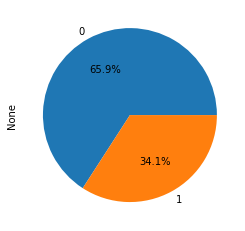

In [ ]:
data = pd.Series([nr_nodrop_original, nr_drop_original])
data.plot.pie(autopct="%.1f%%");

## Sbilanciamento dataset di training

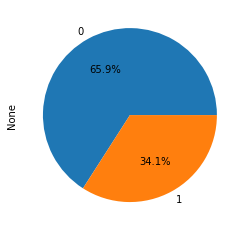

In [ ]:
data = pd.Series([nr_nodrop, nr_drop])
data.plot.pie(autopct="%.1f%%");

Le due classi (i.e. target del classificatore) appaiono leggermente sbilanciate: in dettaglio, la classe dei soggetti che manifestano dropout ha una cardinalità inferiore della classe in cui non si è avuto dropout.

## Random under-sampling
Tecnica consistente nell'eliminazione in maniera randomica di istanze della classe sovra-rappresentata (studenti che non hanno avuto un dropout) fintanto che la sua cardinalità coincida con quella della classe sotto-rappresentata.

In [ ]:
class_nodrop = train_dataset[train_dataset['DROPOUT'] == False] # Sovrarappresentata (== False funziona per casting implicito)
class_drop = train_dataset[train_dataset['DROPOUT'] == True] # Sottorappresentata (== True funziona per casting implicito)

# Sotto campionamento di class_drop in modo che abbia stessa cardinalità di class_nodrop
class_nodrop = class_nodrop.sample(len(class_drop))

print(f'Classe No-drop: {len(class_nodrop):,}')
print(f'Classe Drop: {len(class_drop):,}')

Classe No-drop: 74,620
Classe Drop: 74,620


In [ ]:
# Il dataset di training va aggiornato unendo i due class_drop e class_nodrop
print(f'Dimensioni train_dataset originale: {train_dataset.shape}')
train_dataset = class_drop.append(class_nodrop)
train_dataset = train_dataset.sample(frac=1)
print(f'Dimensioni train_dataset undersampled: {train_dataset.shape}')

Dimensioni train_dataset originale: (219024, 50)
Dimensioni train_dataset undersampled: (149240, 50)


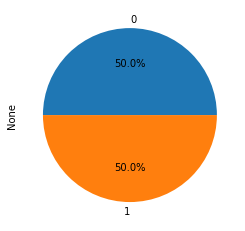

In [ ]:
# Verifica che effettivamente l'undersampling abbia funzionato
nr_nodrop, nr_drop = np.bincount(train_dataset['DROPOUT'])
data = pd.Series([nr_nodrop, nr_drop])
data.plot.pie(autopct="%.1f%%");

## Synthetic minority over-sampling (SMOTE)
Abbiamo scelto di tentare la variante della tecnica dell'over-sampling come alternativa al random under-sampling, in quanto permette di evitare la riduzione di cardinalità del training set che inevitabilmente segue al random under-sampling.


VAI MICHELE SCELGO TE


In [ ]:
# La seguente cella non riesce ad eseguire in Google Colab (finisce la memoria e riavvia il runtime).
# I risultati di questa cella sono stati calcolati localmente e salvati su un dataset CSV che è possibile importare grazie alle cella seguente.
# Imports
from imblearn.over_sampling import SMOTENC

# Create KMeans-Random instance
categorical_features_indexes = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]
smotenc = SMOTENC(categorical_features_indexes, random_state=19, n_jobs=-1)

# Fit and resample imbalanced dataa
X_SMOTE = train_dataset.loc[:, train_dataset.columns != 'DROPOUT']
y_SMOTE = train_dataset['DROPOUT']
X_SMOTE_res, y_SMOTE_res = smotenc.fit_resample(X_SMOTE, y_SMOTE)

no_drop, drop = np.bincount(y_SMOTE['DROPOUT'])
res_no_drop, res_drop = np.bincount(y_SMOTE_res['DROPOUT'])

print(f'Classe No-drop originale: {len(no_drop):,} - Classe No-drop ricampionata: {len(res_no_drop):,}')
print(f'Classe Drop originale: {len(drop):,} - Classe Drop ricampionata: {len(res_drop):,}')

In [ ]:
if from_gdrive:
    RESAMPLED_DATASET_PATH = "Data/resampled_training_dataset.csv"
else:
    RESAMPLED_DATASET_PATH = "../resampled_training_dataset.csv" 

resampled_train_dataset = pd.read_csv(RESAMPLED_DATASET_PATH, sep=',')

In [ ]:
nr_nodrop_sample, nr_drop_sample = np.bincount(resampled_train_dataset['DROPOUT'])
total_sample = nr_nodrop_sample + nr_drop_sample
print(f'Nr di istanze: {total_sample:,}\nIstanze con dropout a True: {nr_drop_sample:,} ({(100 * nr_drop_sample / total_sample):.2f}% del totale)\nProporzione dropout True v/s False: {round(nr_drop_sample/nr_nodrop_sample, 2)} : 1')

Nr di istanze: 288,572
Istanze con dropout a True: 144,286 (50.00% del totale)
Proporzione dropout True v/s False: 1.0 : 1


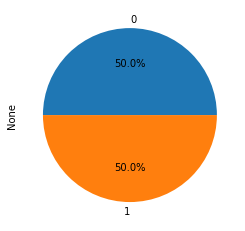

In [ ]:
data = pd.Series([nr_nodrop_sample, nr_drop_sample])
data.plot.pie(autopct="%.1f%%");

# Deep learning

## Conversione del dataframe di Pandas nel tensore di TensorFlow.

In [37]:
def dataframe_to_dataset(dataframe):
    dataframe = dataframe.copy()
    dataframe = dataframe.drop("Unnamed: 0", axis=1)
    labels = dataframe.pop("DROPOUT")
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels.values))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds

In [38]:
#train_dataset = train_dataset.sample(100)
train_ds = dataframe_to_dataset(train_dataset)
val_ds = dataframe_to_dataset(validation_dataset)
test_ds = dataframe_to_dataset(test_dataset)

for x, y in train_ds.take(1):
    print("Input:", x)
    print("Target:", y)

Input: {'prog': <tf.Tensor: shape=(), dtype=int64, numpy=10>, 'sesso': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'mese': <tf.Tensor: shape=(), dtype=int64, numpy=10>, 'anno': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'luogo': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'eta': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'freq_asilo_nido': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'freq_scuola_materna': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'luogo_padre': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'titolo_padre': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'prof_padre': <tf.Tensor: shape=(), dtype=int64, numpy=7>, 'luogo_madre': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'titolo_madre': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'prof_madre': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'regolarità': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'cittadinanza': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'cod_provincia_ISTAT': <tf.Tensor: shape=(), dtype=int64, n

## Divisione del dataset di training in blocchi

In [39]:
train_ds = train_ds.batch(32, drop_remainder=True)
val_ds = val_ds.batch(32, drop_remainder=True)
test_ds = test_ds.batch(32, drop_remainder=True)

In [40]:
from tensorflow.keras.layers.experimental.preprocessing import IntegerLookup
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.layers.experimental.preprocessing import StringLookup


def encode_numerical_feature(feature, name, dataset):
    # Create a Normalization layer for our feature
    normalizer = Normalization()

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the statistics of the data
    normalizer.adapt(feature_ds)

    # Normalize the input feature
    encoded_feature = normalizer(feature)
    return encoded_feature


def encode_categorical_feature(feature, name, dataset, is_string):
    lookup_class = StringLookup if is_string else IntegerLookup
    # Create a lookup layer which will turn strings into integer indices
    lookup = lookup_class(output_mode="binary")

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the set of possible string values and assign them a fixed integer index
    lookup.adapt(feature_ds)

    # Turn the string input into integer indices
    encoded_feature = lookup(feature)
    return encoded_feature


In [41]:
# Categorical features encoded as integers
prog = keras.Input(shape=(1,), name="prog", dtype="int64")
mese = keras.Input(shape=(1,), name="mese", dtype="int64")
anno = keras.Input(shape=(1,), name="anno", dtype="int64")
luogo = keras.Input(shape=(1,), name="luogo", dtype="int64")
eta = keras.Input(shape=(1,), name="eta", dtype="int64")
freq_asilo_nido = keras.Input(shape=(1,), name="freq_asilo_nido", dtype="int64")
freq_scuola_materna = keras.Input(shape=(1,), name="freq_scuola_materna", dtype="int64")
luogo_padre = keras.Input(shape=(1,), name="luogo_padre", dtype="int64")
titolo_padre = keras.Input(shape=(1,), name="titolo_padre", dtype="int64")
prof_padre = keras.Input(shape=(1,), name="prof_padre", dtype="int64")
luogo_madre = keras.Input(shape=(1,), name="luogo_madre", dtype="int64")
titolo_madre = keras.Input(shape=(1,), name="titolo_madre", dtype="int64")
prof_madre = keras.Input(shape=(1,), name="prof_madre", dtype="int64")
regolarita = keras.Input(shape=(1,), name="regolarità", dtype="int64")
cittadinanza = keras.Input(shape=(1,), name="cittadinanza", dtype="int64")
cod_provincia_ISTAT = keras.Input(shape=(1,), name="cod_provincia_ISTAT", dtype="int64")
sigla_provincia_istat = keras.Input(shape=(1,), name="sigla_provincia_istat", dtype="int64")
Nome_reg = keras.Input(shape=(1,), name="Nome_reg", dtype="int64")
Cod_reg = keras.Input(shape=(1,), name="Cod_reg", dtype="int64")
Areageo_3 = keras.Input(shape=(1,), name="Areageo_3", dtype="int64")
Areageo_4 = keras.Input(shape=(1,), name="Areageo_4", dtype="int64")
Areageo_5 = keras.Input(shape=(1,), name="Areageo_5", dtype="int64")
Areageo_5_Istat = keras.Input(shape=(1,), name="Areageo_5_Istat", dtype="int64")
LIVELLI = keras.Input(shape=(1,), name="LIVELLI", dtype="int64")

sesso = keras.Input(shape=(1,), name="sesso", dtype="int64")
Pon = keras.Input(shape=(1,), name="Pon", dtype="int64")

# Numerical features
pu_ma_gr = keras.Input(shape=(1,), name="pu_ma_gr", dtype="float32")
pu_ma_no = keras.Input(shape=(1,), name="pu_ma_no", dtype="float32")
Fattore_correzione_new = keras.Input(shape=(1,), name="Fattore_correzione_new", dtype="float32")
Cheating = keras.Input(shape=(1,), name="Cheating", dtype="float32")
WLE_MAT = keras.Input(shape=(1,), name="WLE_MAT", dtype="float32")
WLE_MAT_200 = keras.Input(shape=(1,), name="WLE_MAT_200", dtype="float32")
WLE_MAT_200_CORR = keras.Input(shape=(1,), name="WLE_MAT_200_CORR", dtype="float32")
pu_ma_no_corr = keras.Input(shape=(1,), name="pu_ma_no_corr", dtype="float32")
n_stud_prev = keras.Input(shape=(1,), name="n_stud_prev", dtype="float32")
Numeri = keras.Input(shape=(1,), name="Numeri", dtype="float32")
n_classi_prev = keras.Input(shape=(1,), name="n_classi_prev", dtype="float32")
Dati = keras.Input(shape=(1,), name="Dati e previsioni", dtype="float32")
Riconoscere_forme = keras.Input(shape=(1,), name="Riconoscere le forme nello spazio e utilizzarle per la risoluzione di problemi geometrici o di modellizzazione", dtype="float32")
Conoscere_padr = keras.Input(shape=(1,), name="Conoscere e padroneggiare i contenuti specifici della matematica", dtype="float32")
Relazioni = keras.Input(shape=(1,), name="Relazioni e funzioni", dtype="float32")
Spazio = keras.Input(shape=(1,), name="Spazio figure", dtype="float32")
Acquisire = keras.Input(shape=(1,), name="Acquisire progressivamente forme tipiche del pensiero matematico", dtype="float32")
Conoscere_util = keras.Input(shape=(1,), name="Conoscere e utilizzare algoritmi e procedure", dtype="float32")
Rappresentare = keras.Input(shape=(1,), name="Rappresentare relazioni e dati e, in situazioni significative, utilizzare le rappresentazioni per ricavare informazioni, formulare giudizi e prendere decisioni", dtype="float32")
Riconoscere_contesti = keras.Input(shape=(1,), name="Riconoscere in contesti diversi il carattere misurabile di oggetti e fenomeni, utilizzare strumenti di misura, misurare grandezze, stimare misure di grandezze", dtype="float32")
Risolvere = keras.Input(shape=(1,), name="Risolvere problemi utilizzando strategie in ambiti diversi – numerico, geometrico, algebrico –", dtype="float32")
Utilizzare = keras.Input(shape=(1,), name="Utilizzare strumenti, modelli e rappresentazioni nel trattamento quantitativo dell'informazione in ambito scientifico, tecnologico, economico e sociale", dtype="float32")

all_inputs = [
    prog, 
    sesso, 
    mese, 
    anno, 
    luogo, 
    eta, 
    freq_asilo_nido, 
    freq_scuola_materna, 
    luogo_padre, 
    titolo_padre, 
    prof_padre, 
    luogo_madre, 
    titolo_madre, 
    prof_madre, 
    regolarita,
    cittadinanza, 
    cod_provincia_ISTAT, 
    sigla_provincia_istat, 
    Nome_reg, 
    Cod_reg, 
    Areageo_3, 
    Areageo_4, 
    Areageo_5, 
    Areageo_5_Istat, 
    Pon, 
    pu_ma_gr, 
    pu_ma_no, 
    Fattore_correzione_new, 
    Cheating, 
    WLE_MAT, 
    WLE_MAT_200, 
    WLE_MAT_200_CORR, 
    pu_ma_no_corr, 
    n_stud_prev, 
    n_classi_prev, 
    LIVELLI, 
    Numeri, 
    Dati, 
    Riconoscere_forme, 
    Conoscere_padr, 
    Relazioni, 
    Spazio, 
    Acquisire, 
    Conoscere_util, 
    Rappresentare, 
    Riconoscere_contesti, 
    Risolvere, 
    Utilizzare     
]

In [42]:
# Integer categorical features
sesso_encoded = encode_categorical_feature(sesso, "sesso", train_ds, False)
Pon_encoded = encode_categorical_feature(Pon, "Pon", train_ds, False)

n_stud_prev_encoded = encode_numerical_feature(n_stud_prev, "n_stud_prev", train_ds)
n_classi_prev_encoded = encode_numerical_feature(n_classi_prev, "n_classi_prev", train_ds)
pu_ma_gr_encoded = encode_numerical_feature(pu_ma_gr, "pu_ma_gr", train_ds)
pu_ma_no_encoded = encode_numerical_feature(pu_ma_no, "pu_ma_no", train_ds)
Fattore_correzione_new_encoded = encode_numerical_feature(Fattore_correzione_new, "Fattore_correzione_new", train_ds)
Cheating_encoded = encode_numerical_feature(Cheating, "Cheating", train_ds)
WLE_MAT_encoded = encode_numerical_feature(WLE_MAT, "WLE_MAT", train_ds)
WLE_MAT_200_encoded = encode_numerical_feature(WLE_MAT_200, "WLE_MAT_200", train_ds)
WLE_MAT_200_CORR_encoded = encode_numerical_feature(WLE_MAT_200_CORR, "WLE_MAT_200_CORR", train_ds)
pu_ma_no_corr_encoded = encode_numerical_feature(pu_ma_no_corr, "pu_ma_no_corr", train_ds)
Numeri_encoded = encode_numerical_feature(Numeri, "Numeri", train_ds)
Dati_encoded = encode_numerical_feature(Dati, "Dati e previsioni", train_ds)
Riconoscere_forme_encoded = encode_numerical_feature(Riconoscere_forme, "Riconoscere le forme nello spazio e utilizzarle per la risoluzione di problemi geometrici o di modellizzazione", train_ds)
Conoscere_padr_encoded = encode_numerical_feature(Conoscere_padr, "Conoscere e padroneggiare i contenuti specifici della matematica", train_ds)
Relazioni_encoded = encode_numerical_feature(Relazioni, "Relazioni e funzioni", train_ds)
Spazio_encoded = encode_numerical_feature(Spazio, "Spazio figure", train_ds)
Acquisire_encoded = encode_numerical_feature(Acquisire, "Acquisire progressivamente forme tipiche del pensiero matematico", train_ds)
Conoscere_util_encoded = encode_numerical_feature(Conoscere_util, "Conoscere e utilizzare algoritmi e procedure", train_ds)
Rappresentare_encoded = encode_numerical_feature(Rappresentare, "Rappresentare relazioni e dati e, in situazioni significative, utilizzare le rappresentazioni per ricavare informazioni, formulare giudizi e prendere decisioni", train_ds)
Riconoscere_contesti_encoded = encode_numerical_feature(Riconoscere_contesti, "Riconoscere in contesti diversi il carattere misurabile di oggetti e fenomeni, utilizzare strumenti di misura, misurare grandezze, stimare misure di grandezze", train_ds)
Risolvere_encoded = encode_numerical_feature(Risolvere, "Risolvere problemi utilizzando strategie in ambiti diversi – numerico, geometrico, algebrico –", train_ds)
Utilizzare_encoded = encode_numerical_feature(Utilizzare, "Utilizzare strumenti, modelli e rappresentazioni nel trattamento quantitativo dell'informazione in ambito scientifico, tecnologico, economico e sociale", train_ds)

prog_encoded = encode_categorical_feature(prog, "prog", train_ds, False)
mese_encoded = encode_categorical_feature(mese, "mese", train_ds, False)
anno_encoded = encode_categorical_feature(anno, "anno", train_ds, False)
luogo_encoded = encode_categorical_feature(luogo, "luogo", train_ds, False)
eta_encoded = encode_categorical_feature(eta, "eta", train_ds, False)
freq_asilo_nido_encoded = encode_categorical_feature(freq_asilo_nido, "freq_asilo_nido", train_ds, False)
freq_scuola_materna_encoded = encode_categorical_feature(freq_scuola_materna, "freq_scuola_materna", train_ds, False)
luogo_padre_encoded = encode_categorical_feature(luogo_padre, "luogo_padre", train_ds, False)
titolo_padre_encoded = encode_categorical_feature(titolo_padre, "titolo_padre", train_ds, False)
prof_padre_encoded = encode_categorical_feature(prof_padre, "prof_padre", train_ds, False)
luogo_madre_encoded = encode_categorical_feature(luogo_madre, "luogo_madre", train_ds, False)
titolo_madre_encoded = encode_categorical_feature(titolo_madre, "titolo_madre", train_ds, False)
prof_madre_encoded = encode_categorical_feature(prof_madre, "prof_madre", train_ds, False)
regolarita_encoded = encode_categorical_feature(regolarita, "regolarità", train_ds, False)
cittadinanza_encoded = encode_categorical_feature(cittadinanza, "cittadinanza", train_ds, False)
cod_provincia_ISTAT_encoded = encode_categorical_feature(cod_provincia_ISTAT, "cod_provincia_ISTAT", train_ds, False)
sigla_provincia_istat_encoded = encode_categorical_feature(sigla_provincia_istat, "sigla_provincia_istat", train_ds, False)
Nome_reg_encoded = encode_categorical_feature(Nome_reg, "Nome_reg", train_ds, False)
Cod_reg_encoded = encode_categorical_feature(Cod_reg, "Cod_reg", train_ds, False)
Areageo_3_encoded = encode_categorical_feature(Areageo_3, "Areageo_3", train_ds, False)
Areageo_4_encoded = encode_categorical_feature(Areageo_4, "Areageo_4", train_ds, False)
Areageo_5_encoded = encode_categorical_feature(Areageo_5, "Areageo_5", train_ds, False)
Areageo_5_Istat_encoded = encode_categorical_feature(Areageo_5_Istat, "Areageo_5_Istat", train_ds, False)
LIVELLI_encoded = encode_categorical_feature(LIVELLI, "LIVELLI", train_ds, False)


In [44]:
all_features = layers.concatenate(
    [
        prog_encoded, 
        sesso_encoded, 
        mese_encoded, 
        anno_encoded, 
        luogo_encoded, 
        eta_encoded, 
        freq_asilo_nido_encoded, 
        freq_scuola_materna_encoded, 
        luogo_padre_encoded, 
        titolo_padre_encoded, 
        prof_padre_encoded, 
        luogo_madre_encoded, 
        titolo_madre_encoded, 
        prof_madre_encoded, 
        regolarita_encoded,
        cittadinanza_encoded, 
        cod_provincia_ISTAT_encoded, 
        sigla_provincia_istat_encoded, 
        Nome_reg_encoded, 
        Cod_reg_encoded, 
        Areageo_3_encoded, 
        Areageo_4_encoded, 
        Areageo_5_encoded, 
        Areageo_5_Istat_encoded, 
        Pon_encoded, 
        pu_ma_gr_encoded, 
        pu_ma_no_encoded, 
        Fattore_correzione_new_encoded, 
        Cheating_encoded, 
        WLE_MAT_encoded, 
        WLE_MAT_200_encoded, 
        WLE_MAT_200_CORR_encoded, 
        pu_ma_no_corr_encoded, 
        n_stud_prev_encoded, 
        n_classi_prev_encoded, 
        LIVELLI_encoded, 
        Numeri_encoded, 
        Dati_encoded, 
        Riconoscere_forme_encoded, 
        Conoscere_padr_encoded, 
        Relazioni_encoded, 
        Spazio_encoded, 
        Acquisire_encoded, 
        Conoscere_util_encoded, 
        Rappresentare_encoded, 
        Riconoscere_contesti_encoded, 
        Risolvere_encoded, 
        Utilizzare_encoded
    ]
)

## Diverse architetture

### Architettura 48-(32)-1 (relu - sigmoid) (Adam)

In [ ]:
from tensorflow.keras import metrics
from tensorflow.keras import optimizers
from tensorflow.keras import losses

my_init = keras.initializers.glorot_uniform(seed=1)

x = layers.Dense(32, activation="relu", kernel_initializer=my_init)(all_features)
x = layers.Dropout(0.5, seed=1)(x)
output = layers.Dense(1, activation="sigmoid", kernel_initializer=my_init)(x)
model = keras.Model(all_inputs, output)
model.compile(optimizer=optimizers.Adam(),
              loss=losses.BinaryCrossentropy(),
              metrics=[metrics.Accuracy(),
                       metrics.Precision(),
                       metrics.Recall(),
                       metrics.FalseNegatives(),
                       metrics.FalsePositives(),
                       metrics.TrueNegatives(),
                       metrics.TruePositives()])

In [ ]:
# keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [ ]:
# addestramento del modello
model.fit(train_ds, epochs=18, validation_data=val_ds, verbose=2)

Epoch 1/18
4663/4663 - 95s - loss: 0.0341 - accuracy: 0.0167 - precision: 0.9903 - recall: 0.9863 - false_negatives: 1019.0000 - false_positives: 723.0000 - true_negatives: 73884.0000 - true_positives: 73590.0000 - val_loss: 5.9930e-05 - val_accuracy: 5.6619e-04 - val_precision: 1.0000 - val_recall: 1.0000 - val_false_negatives: 0.0000e+00 - val_false_positives: 0.0000e+00 - val_true_negatives: 36097.0000 - val_true_positives: 18655.0000
Epoch 2/18


KeyboardInterrupt: ignored

In [ ]:
score = model.evaluate(test_ds.batch(32, drop_remainder=True))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

### Architettura 48-(32-32)-1 (tanh - tanh - sigmoid) (sgd)

https://visualstudiomagazine.com/articles/2018/08/30/neural-binary-classification-keras.aspx

The Glorot initialization algorithm is a relatively advanced technique that often works better than a random uniform algorithm.

In [45]:
my_init = keras.initializers.glorot_uniform(seed=1)

x = layers.Dense(32, activation="tanh", kernel_initializer=my_init)(all_features)
x = layers.Dense(32, activation="tanh", kernel_initializer=my_init)(x)
output = layers.Dense(1, activation="sigmoid", kernel_initializer=my_init)(x)

model1 = keras.Model(all_inputs, output)

model1.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),
              loss=losses.BinaryCrossentropy(),
              metrics=[metrics.Accuracy(),
                       metrics.Precision(),
                       metrics.Recall(),
                       metrics.FalseNegatives(),
                       metrics.FalsePositives(),
                       metrics.TrueNegatives(),
                       metrics.TruePositives()])

The demo uses a batch size of 32, which is called mini-batch training. Alternatives are a batch size of one, called online training, and a batch size equal to the size of the training set, called batch training. 

In [46]:
h = model1.fit(train_ds, batch_size=32, epochs=50, validation_data=val_ds, verbose=2)

Epoch 1/50
4663/4663 - 93s - loss: 0.0692 - accuracy: 0.0000e+00 - precision_3: 0.9788 - recall_3: 0.9787 - false_negatives_3: 1587.0000 - false_positives_3: 1578.0000 - true_negatives_3: 73029.0000 - true_positives_3: 73022.0000 - val_loss: 0.0050 - val_accuracy: 0.0000e+00 - val_precision_3: 1.0000 - val_recall_3: 0.9977 - val_false_negatives_3: 43.0000 - val_false_positives_3: 0.0000e+00 - val_true_negatives_3: 36098.0000 - val_true_positives_3: 18611.0000
Epoch 2/50


KeyboardInterrupt: ignored

The demo captures the return object from fit(), which is a log of training history information, but doesn't use it. This code would save the model using the default hierarchical data format, which you can think of as sort of like a binary XML. It is also possible to save check-point models during training using the custom callback mechanism.

In [ ]:
mp = ".\\Models\\banknote_model.h5"
model.save(mp)

In [ ]:
score = model1.evaluate(test_ds.batch(32, drop_remainder=True))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

## Predizioni

In [ ]:
sample = {
    "age": 60,
    "sex": 1,
    "cp": 1,
    "trestbps": 145,
    "chol": 233,
    "fbs": 1,
    "restecg": 2,
    "thalach": 150,
    "exang": 0,
    "oldpeak": 2.3,
    "slope": 3,
    "ca": 0,
    "thal": "fixed",
}

input_dict = {name: tf.convert_to_tensor([value]) for name, value in sample.items()}
predictions = model.predict(input_dict)

print(
    "This particular patient had a %.1f percent probability "
    "of having a heart disease, as evaluated by our model." % (100 * predictions[0][0],)
)

# ESEGUI QUEST'ULTIMA CELLA PER SMONTARE GDRIVE

In [ ]:
drive.flush_and_unmount()
print('All changes made in this colab session should now be visible in Drive.')

# Risultati ottenuti

Brevi conclusioni traibili da questi risultati: non cambia quasi nulla con diverse configurazioni del solver. Bisogna per forza cambiare il modello.
L'accuratezza 50% viene raggiunta dopo circa 10 epoche (è sostanzialmente stabile da quel momento in poi), tranne softmax che lo è dopo circa 20.

## Architettura 48-(32)-1 (relu - sigmoid) (Adam)

### Configurazione di default + epoche 30

- Accuratezza: 50%
- Accuratezza validazione: 34%
- Epoche: 30

### Configurazione con SGD

- Accuratezza: 50%
- Accuratezza validazione: 34%
- Epoche: 50

### Configurazione di default + dropout

- Accuratezza: 50%
- Accuratezza validazione: 34%
- Epoche: 50

### Configurazione di default + learning rate 0.01

- Accuratezza: 50%
- Accuratezza validazione: 34%
- Epoche: 50

### Configurazione di default + batch size 128

- Accuratezza: 50%
- Accuratezza validazione: 34%
- Epoche: 50

### Configurazione di default + activation softmax

- Accuratezza: 50%
- Accuratezza validazione: 34%
- Epoche: 50

## Architettura 48-(32-32)-1 (tanh - tanh - sigmoid) (sgd)

### Configurazione

- Accuratezza: %
- Accuratezza validazione: %
- Epoche: 50